# Derivatives

 Amin Hashemian

## 1. Mathematical definition of a derivative

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}\\)

\\( f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}\\)

All three definitions are equivalent in case of a continuous function.

## 2. Numerical implementation of first-order derivatives

Forward differences
\\( f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}\\)

Backward differences
\\( f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}\\)

Central differences
\\( f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}\\)

### Example function: \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x)*x - 1/100*x**3

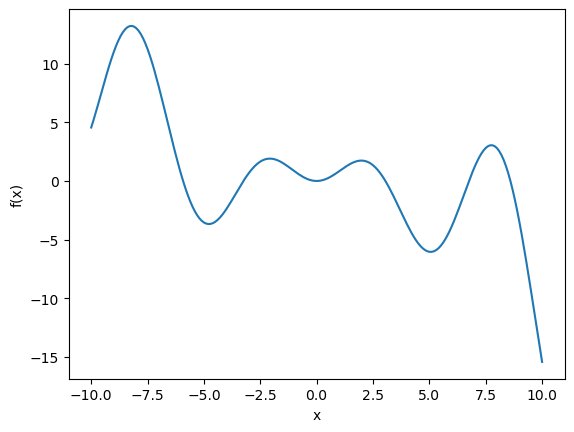

In [3]:
x_list = np.linspace(-10, 10, 201)
y_list = f(x_list)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x_list, y_list)

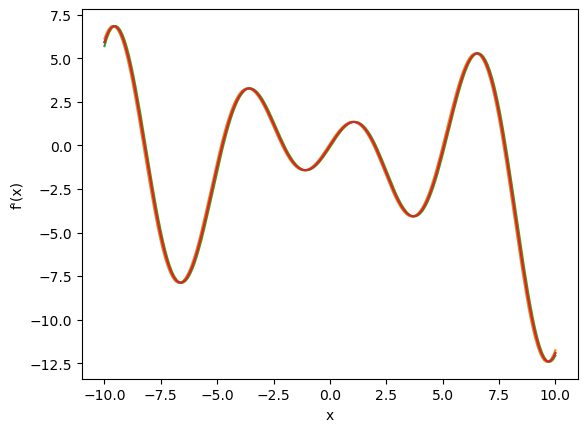

In [4]:
x_list = np.linspace(-10, 10, 201)
analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2

h = 0.1
forward_d_list = ( f(x_list+h) - f(x_list) ) / h
backward_d_list = ( f(x_list) - f(x_list-h) ) / h
central_d_list = ( f(x_list+h) - f(x_list-h) ) / (2*h)

plt.xlabel('x')
plt.ylabel("f'(x)")
plt.plot(x_list, analytical_d_list)
plt.plot(x_list, forward_d_list)
plt.plot(x_list, backward_d_list)
plt.plot(x_list, central_d_list)

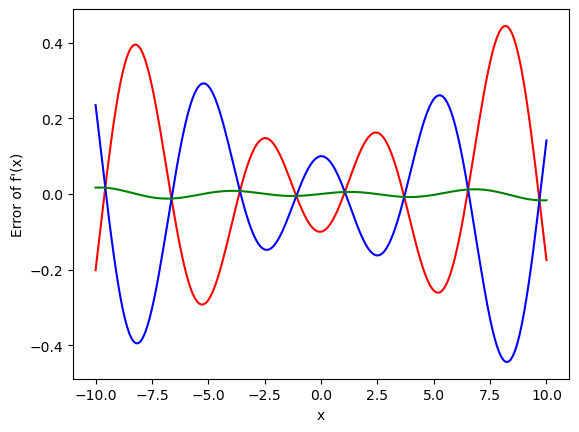

In [5]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")

plt.plot(x_list, analytical_d_list - forward_d_list, 'red')
plt.plot(x_list, analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytical_d_list - central_d_list, 'green')

### Why is central differences (typically) better than forward and backward differences?

Forward differences
\\( f'(x)=\frac{f(x+h)-f(x)}{h}+\mathcal{O}(h)\\)

Backward differences
\\( f'(x)=\frac{f(x)-f(x-h)}{h}+\mathcal{O}(h)\\)

Central differences
\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

- \\(\mathcal{O}(h^n)\\) means that the error is proportional to h^n.
- Since \\(h\\) is small, the central differences method is more accurate. 

Taylor expansion: 

\\(f(x+h)=f(x)+f'(x)h+\frac{1}{2}f''(x)h^2+\frac{1}{6}f'''(x)h^3+\dots\\)

\\(f(x-h)=f(x)-f'(x)h+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\\)

- From the first and second line we can imediately see the  \\(\mathcal{O}(h)\\) dependence of the forward and backward differences methods

\\(f'(x)=\frac{1}{h}\left[f(x+h)-f(x)-\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3+\dots\right]=\frac{f(x+h)-f(x)}{h}-\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2+\dots\\)

\\(f'(x)=\frac{1}{h}\left[f(x)-f(x-h)+\frac{1}{2}f''(x)h^2-\frac{1}{6}f'''(x)h^3\pm\dots\right]=\frac{f(x)-f(x-h)}{h}+\frac{1}{2}f''(x)h-\frac{1}{6}f'''(x)h^2\pm\dots\\)

- To find the \\(\mathcal{O}(h^2)\\) dependence of the central differences method, we have to subtract the two terms

\\(f(x+h)-f(x-h)=2f'(x)h+\frac{1}{3}f'''(x)h^3+\dots\\)

\\(\frac{1}{2h}\left[f(x+h)-f(x-h)\right]=f'(x)+\frac{1}{6}f'''(x)h^2+\dots\\)

\\( f'(x)=\frac{f(x+h)-f(x-h)}{2h}+\mathcal{O}(h^2)\\)

### Higher accuracy:

Richardson: \\(f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)\\)

In [6]:
def D1Richardson(f, x, h):
    # f: Function
    # x: Argument of f
    # h: Stepsize
    return 1/(12*h) * ( f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h) )

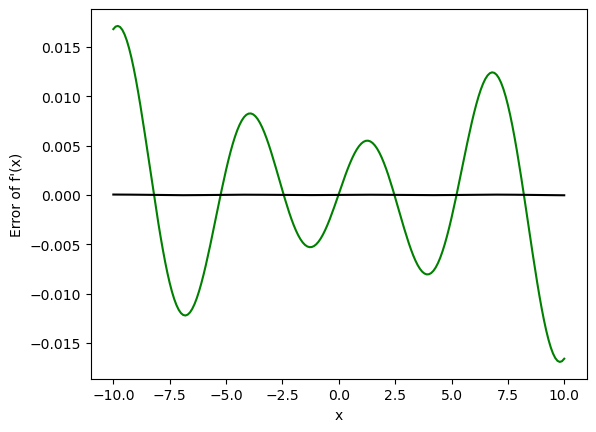

In [7]:
plt.xlabel('x')
plt.ylabel("Error of f'(x)")

richardson_d_list = D1Richardson(f, x_list, h)

#plt.plot(x_list, analytical_d_list - forward_d_list, 'red')
#plt.plot(x_list, analytical_d_list - backward_d_list, 'blue')
plt.plot(x_list, analytical_d_list - central_d_list, 'green')
plt.plot(x_list, analytical_d_list - richardson_d_list, 'black')

### Even higher accuracy

Iteration formula:

\\(D_{n+1}=\frac{2^{2n}D_n(h)-D_n(2h)}{2^{2n}-1}\\)

In [8]:
def D1nRichardson(nmax, f, x, h):
    # nmax: Order of iteration for 1st derivative
    # f: Function
    # x: Argument of f
    # h: Stepsize
    #d0 = np.array([ D1Richardson(f, x, h*2**j) for j in range(0,n)])
    d0 = np.array([ 1/(12*h*2**j) * ( f(x-2*h*2**j) - 8*f(x-h*2**j) + 8*f(x+h*2**j) - f(x+2*h*2**j) ) for j in range(0,nmax)])
    for n in range(1,nmax):
        print(d0)
        d = np.array([(2**(2*n)*d0[j] - d0[j+1]) / (2**(2*n)-1) for j in range(0,len(d0)-1)])
        d0 = d
    return d

Calculate f'(x) for \\( f(x)=\sin(x)x-\frac{1}{100}x^3 \\) at \\(x = 3\\)

In [9]:
d1n = D1nRichardson(5, f, 3, h)

[-3.09884994 -3.09873722 -3.09695717 -3.06993837 -2.72051967]
[-3.09888752 -3.09933057 -3.10596344 -3.18641127]
[-3.09885798 -3.09888837 -3.10060025]
[-3.0988575 -3.0988612]


Comparison to D1Richardson

In [10]:
print(D1Richardson(f, 3, h))
print(D1Richardson(f, 3, 2*h))
print(D1Richardson(f, 3, 4*h))
print(D1Richardson(f, 3, 8*h))
print(D1Richardson(f, 3, 16*h))

-3.0988499416783317
-3.098737217338038
-3.0969571739647574
-3.0699383701235057
-2.7205196742684765


Analytical result: \\( f'(3)=3\cos(3)+\sin(3)-\frac{3}{100}\cdot 3^2 \\)

In [11]:
3*np.cos(3) + np.sin(3) - 3/100*3**2

-3.098857481741469

In [12]:
3*np.cos(3) + np.sin(3) - 3/100*3**2 - d1n

array([1.18064047e-09])

## 3. Second derivatives

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x)-f'(x-h)}{h}\\)

\\( f''(x)=\lim_{h\rightarrow 0}\frac{f'(x+h)-f'(x-h)}{2h}\\)

- Double forward & double backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x+h)\right]-\left[f(x+h)-f(x)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}\\)

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x)-f(x-h)\right]-\left[f(x-h)-f(x-2h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x)-2f(x-h)+f(x-2h)}{h^2}\\)

- Forward and backward

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+h)-f(x)\right]-\left[f(x)-f(x-h)\right]}{h^2}=\lim_{h\rightarrow 0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\)

- Double central (same result as forward and backward for \\(2h=g\\))

\\(f''(x)=\lim_{h\rightarrow 0}\frac{\left[f(x+2h)-f(x)\right]-\left[f(x)-f(x-2h)\right]}{(2h)^2}=\lim_{h\rightarrow 0}\frac{f(x+2h)-2f(x)+f(x-2h)}{4h^2}=\lim_{g\rightarrow 0}\frac{f(x+g)-2f(x)+f(x-g)}{g^2}\\)

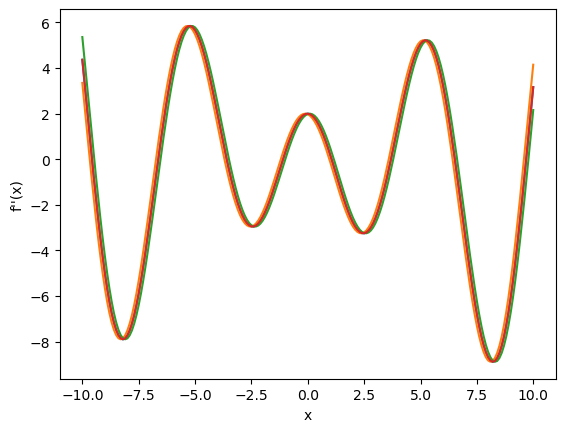

In [13]:
x_list = np.linspace(-10, 10, 201)
#analytical_d_list = np.cos(x_list)*x_list + np.sin(x_list) - 3/100*x_list**2
analytical_d2_list = -np.sin(x_list)*x_list + 2*np.cos(x_list) - 6/100*x_list

h = 0.1
forward_d2_list = ( f(x_list+2*h) - 2*f(x_list+h) + f(x_list) ) / h**2
backward_d2_list = ( f(x_list) - 2*f(x_list-h) + f(x_list-2*h) ) / h**2
central_d2_list = ( f(x_list+h) - 2*f(x_list) + f(x_list-h) ) / h**2

plt.xlabel('x')
plt.ylabel("f''(x)")
plt.plot(x_list, analytical_d2_list)
plt.plot(x_list, forward_d2_list)
plt.plot(x_list, backward_d2_list)
plt.plot(x_list, central_d2_list)